# Estudo do tempo de corrida em minutos por km (pace) 📚🏃

> Análise a partir da Maratona de Boston 2023


In [162]:
#@title Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns
plt.style.use('ggplot')

In [163]:
#@ Leitura do arquivo

uri = "./boston_marathon_2023.csv"
maratona = pd.read_csv(uri)

## Análise da Estrutura do Dataset 📖

In [164]:
#@title Verificando duplicações

maratona.duplicated().any()

False

In [165]:
#@title Renomeando colunas

maratona.columns = ["divisao_faixa", "posicao_geral", "posicao_genero", "posicao_faixa", "nome", "equipe", "numero_peito", "tempo_meia_maratona", "tempo_liquido_maratona", "tempo_bruto_maratona", "genero", "tempo_meia_maratona_segundos", "tempo_liquido_maratona_segundos", "tempo_bruto_maratona_segundos", "tempo_liquido_maratona_minutos"]
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


In [166]:
#@title Adicionando o 'Pace' à tabela

maratona['pace'] = maratona['tempo_liquido_maratona_minutos'] / 42
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667,3.048016
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333,3.061508


In [167]:
#@title Visualização geral

maratona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   divisao_faixa                    26598 non-null  object 
 1   posicao_geral                    26598 non-null  int64  
 2   posicao_genero                   26598 non-null  int64  
 3   posicao_faixa                    26598 non-null  int64  
 4   nome                             26598 non-null  object 
 5   equipe                           26598 non-null  object 
 6   numero_peito                     26598 non-null  object 
 7   tempo_meia_maratona              26526 non-null  object 
 8   tempo_liquido_maratona           26598 non-null  object 
 9   tempo_bruto_maratona             26598 non-null  object 
 10  genero                           26598 non-null  object 
 11  tempo_meia_maratona_segundos     26526 non-null  float64
 12  tempo_liquido_mara

## Análise do Pace e Gênero 📊

> ### Motivação
- Como o pace difere entre homens e mulheres?
- A distribuição do pace é semelhante para ambos os gêneros?
- Como o pace médio varia em diferentes faixas etárias para homens e mulheres?
- Qual é a distribuição percentual de homens e mulheres na maratona?

In [168]:
#@title Selecionando corredores por gênero

homens = maratona[maratona['genero'] == 'M']
mulheres = maratona[maratona['genero'] == 'W']


In [169]:
#@title Média do pace
maratona['pace'].mean()

5.298070209360532

<ipython-input-170-1f29700350ce>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maratona['pace'], shade=True, color='skyblue')


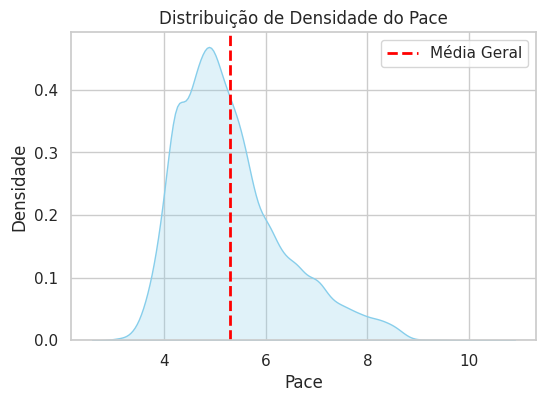

In [170]:
#@title Densidade pace

# configuração inicial
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

# densidade do pace
sns.kdeplot(maratona['pace'], shade=True, color='skyblue')

# linhas verticais para representar a média
plt.axvline(maratona['pace'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média Geral')

plt.title('Distribuição de Densidade do Pace')
plt.xlabel('Pace')
plt.ylabel('Densidade')
plt.legend()
plt.show()

<ipython-input-171-b790feffa6e0>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(homens['pace'], shade=True, color='skyblue', label='Homens')
<ipython-input-171-b790feffa6e0>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mulheres['pace'], shade=True, color='lightcoral', label='Mulheres')
<ipython-input-171-b790feffa6e0>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maratona['pace'], shade=True, color='plum', label='Geral')


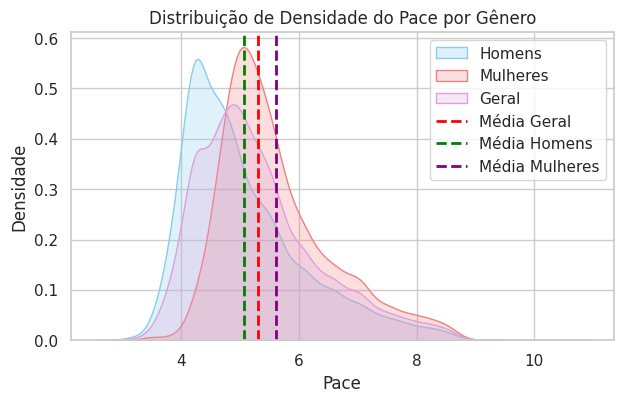

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações adicionais para melhorar a visualização
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

# Gráfico de densidade do Pace para homens
sns.kdeplot(homens['pace'], shade=True, color='skyblue', label='Homens')

# Gráfico de densidade do Pace para mulheres
sns.kdeplot(mulheres['pace'], shade=True, color='lightcoral', label='Mulheres')

sns.kdeplot(maratona['pace'], shade=True, color='plum', label='Geral')


# Adiciona linhas verticais para representar as médias
plt.axvline(maratona['pace'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média Geral')
plt.axvline(homens['pace'].mean(), color='green', linestyle='dashed', linewidth=2, label='Média Homens')
plt.axvline(mulheres['pace'].mean(), color='purple', linestyle='dashed', linewidth=2, label='Média Mulheres')

plt.title('Distribuição de Densidade do Pace por Gênero')
plt.xlabel('Pace')
plt.ylabel('Densidade')

# Adiciona uma legenda
plt.legend()

# Exibe o gráfico
plt.show()


In [172]:
#@title Dados do pace

## para todos
p_geral = maratona['pace'].describe()

## para homens
p_homens = homens['pace'].describe()

## para mulheres
p_mulheres = mulheres['pace'].describe()

print('Para todos\n', p_geral)
print('Para homens\n', p_homens)
print('Para mulheres\n', p_mulheres)


Para todos
 count    26598.000000
mean         5.298070
std          1.041783
min          2.997619
25%          4.549306
50%          5.093452
75%          5.820238
max         10.488492
Name: pace, dtype: float64
Para homens
 count    15175.000000
mean         5.057745
std          1.039410
min          2.997619
25%          4.275198
50%          4.784127
75%          5.565278
max         10.325000
Name: pace, dtype: float64
Para mulheres
 count    11423.000000
mean         5.617333
std          0.955665
min          3.372222
25%          4.944643
50%          5.382143
75%          6.092063
max         10.488492
Name: pace, dtype: float64


In [173]:
#@title Média do pace por faixa etária

## para todos
mpf_todos = maratona.groupby('divisao_faixa')['pace'].mean().reset_index()

## para homens
mpf_homens = homens.groupby('divisao_faixa')['pace'].mean().reset_index()

## para mulheres
mpf_mulheres = mulheres.groupby('divisao_faixa')['pace'].mean().reset_index()

print('Para todos\n', mpf_todos)
print('Para homens\n', mpf_homens)
print('Para mulheres\n', mpf_mulheres)

Para todos
   divisao_faixa      pace
0         18-39  5.037818
1         40-44  5.134520
2         45-49  5.278441
3         50-54  5.474871
4         55-59  5.652182
5         60-64  5.856056
6         65-69  6.153434
7         70-74  6.557524
8         75-79  7.055347
9           80+  7.169127
Para homens
   divisao_faixa      pace
0         18-39  4.678720
1         40-44  4.833377
2         45-49  5.006103
3         50-54  5.269526
4         55-59  5.435386
5         60-64  5.709755
6         65-69  6.022541
7         70-74  6.432884
8         75-79  7.055151
9           80+  7.092989
Para mulheres
   divisao_faixa      pace
0         18-39  5.426327
1         40-44  5.493871
2         45-49  5.615978
3         50-54  5.823973
4         55-59  6.030443
5         60-64  6.164204
6         65-69  6.478595
7         70-74  6.985721
8         75-79  7.056310
9           80+  7.283333


In [174]:
#@title Desvio padrão do pace geral

maratona['pace'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

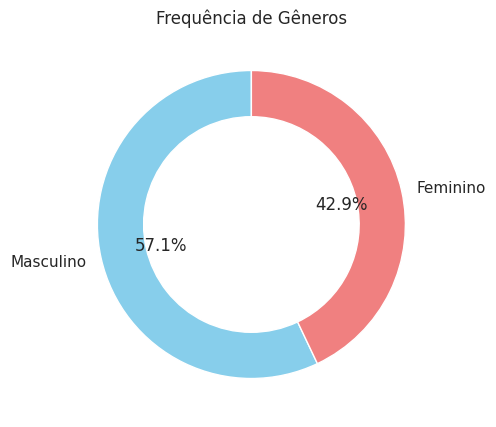

In [175]:
#@title Frequência de Gêneros
df = maratona['genero'].value_counts()

# Plotar gráfico de pizza
df.plot(kind='pie', autopct='%1.1f%%', labels=['Masculino','Feminino'],  startangle=90, figsize=(5, 5), colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))

plt.title("Frequência de Gêneros")
plt.ylabel("")  # remove o rótulo do eixo y
plt.show()

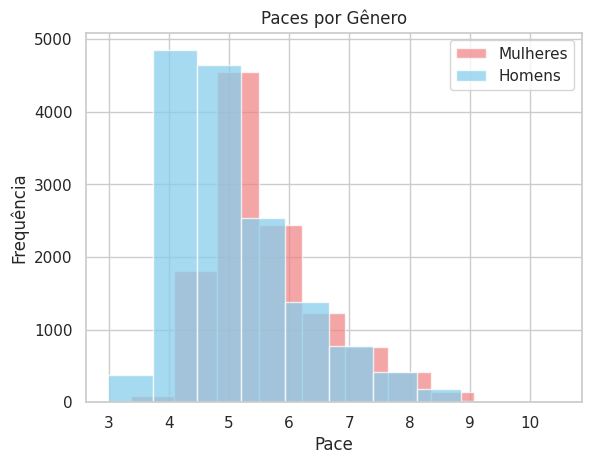

In [176]:
#@title Histograma de paces por gênero

plt.hist(mulheres['pace'], alpha=0.7, label='Mulheres', color='lightcoral')
plt.hist(homens['pace'], alpha=0.75, label='Homens',color='skyblue')
plt.xlabel('Pace', )
plt.ylabel('Frequência')
plt.title("Paces por Gênero")
plt.legend()
plt.show()

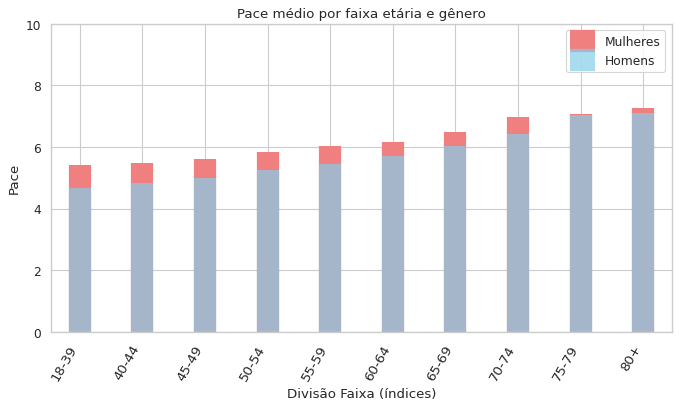

In [177]:
#@title Pace médio por faixa etária e gênero

##  Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# Adicionar as barras verticais representando a média de pace para mulheres e homens
ax.vlines(x=mpf_mulheres.index, ymin=0, ymax=mpf_mulheres['pace'], color='lightcoral', alpha=1, linewidth=20, label='Mulheres')
ax.vlines(x=mpf_homens.index, ymin=0, ymax=mpf_homens['pace'], color='skyblue', alpha=0.7, linewidth=20, label='Homens')

plt.xticks(mpf_homens.index, mpf_homens['divisao_faixa'], rotation=60, horizontalalignment='right', fontsize=12)

ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Divisão Faixa (índices)')

plt.legend()
plt.title('Pace médio por faixa etária e gênero')
plt.show()

# Análise Pace e Equipes de corrida 👩🏻‍🤝‍👩🏻
- Qual a equipe mais veloz?
- Ter uma equipe te torna mais veloz?

In [215]:
equipes = maratona[maratona['equipe'] != 'Team-']

In [218]:
num_equipes = maratona['equipe'].nunique()
print(num_equipes)

86


In [212]:
# Descobrir o número de equipes únicas
## tem que tirar 'Team-'
num_equipes = maratona['equipe'].nunique()

# Exibir o número de equipes
print(f"Total de Equipes: {num_equipes}")

Total de Equipes: ['Team–' 'TeamBoston Athletic Association'
 'TeamHansons-Brooks Distance Project' 'TeamTracksmith Boston Hares'
 "TeamWinner's Circle Running Club" 'TeamWest Valley Track Club'
 'TeamPacers//Georgetown Running Club-New Balance'
 'TeamCharlotte Running Club' 'TeamCrow Athletics'
 'TeamOld Goat Track Club' 'TeamGreater  Boston Track Club'
 'TeamStrawberry Canyon Track Club' 'TeamBull City Track Club'
 'TeamManchester Running Company' 'TeamCahaba Distance Project'
 'TeamCentral Mass Striders' 'TeamWolfpack Running Club'
 'TeamBoulder Track Club' 'TeamDWRunning'
 'TeamGreen Mountain Athletic Association'
 'TeamThe Dashing Whippets Running Team' 'TeamProspect Park Track Club'
 'TeamMontgomery County Road Runners' 'TeamBEN Running Club'
 'TeamNotch Brewing Runners' 'TeamNew Haven Road Runners'
 'TeamU.S. Air Force' 'TeamRogue Racers' 'TeamGarden State Track Club'
 'TeamUnited States Naval Academy Marathon Team'
 'TeamBattle Road Track Club' 'TeamSan Diego Track Club'
 'Team

In [211]:
equipes.head(15)

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667,3.048016
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333,3.061508
5,18-39,6,6,6,"Kipchoge, Eliud",Team–,2,1H 2M 19S,2H 9M 23S,2H 9M 23S,M,3739.0,7763,7763,129.383333,3.080556
6,18-39,7,7,7,"Fauble, Scott",Team–,22,1H 3M 59S,2H 9M 44S,2H 9M 44S,M,3839.0,7784,7784,129.733333,3.088889
7,18-39,8,8,8,"Chahdi, Hassan",Team–,21,1H 3M 59S,2H 9M 46S,2H 9M 46S,M,3839.0,7786,7786,129.766667,3.089683
8,18-39,9,9,9,"Korir, John",Team–,8,1H 2M 19S,2H 10M 4S,2H 10M 4S,M,3739.0,7804,7804,130.066667,3.096825
9,18-39,10,10,10,"Mcdonald, Matthew",TeamBoston Athletic Association,24,1H 3M 59S,2H 10M 17S,2H 10M 17S,M,3839.0,7817,7817,130.283333,3.101984


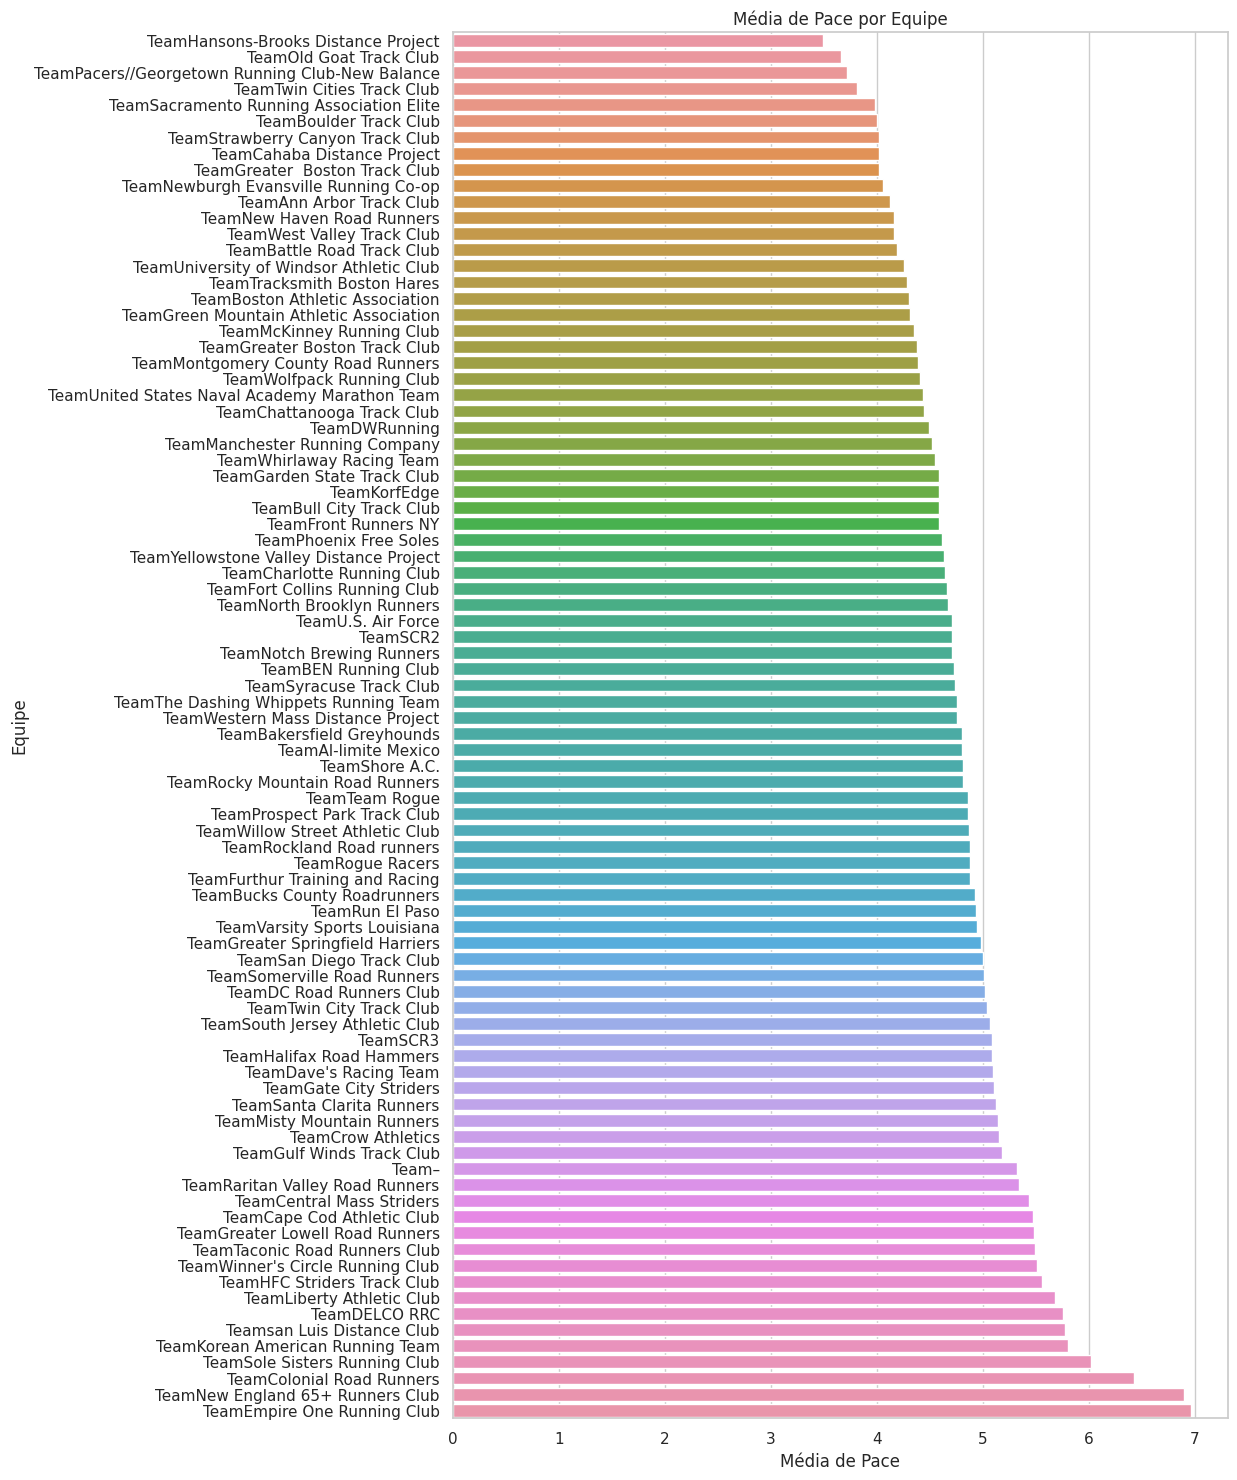

In [184]:
# Calcular a média do pace por equipe
media_pace_equipes = equipes['pace'].mean().reset_index()

# Ordenar as equipes pela média de pace
media_pace_equipes = media_pace_equipes.sort_values(by='pace', ascending=True)

# Criar o gráfico de barras
plt.figure(figsize=(10,18))
sns.barplot(x='pace', y='equipe', data=media_pace_equipes)

# Adicionar rótulos e título
plt.title('Média de Pace por Equipe')
plt.xlabel('Média de Pace')
plt.ylabel('Equipe')

# Exibir o gráfico
plt.show()


In [196]:
# Filtrar dados para aqueles com equipe e sem equipe
com_equipe = maratona[maratona['equipe'].notnull()]
sem_equipe = maratona[maratona['equipe'] == 'Team–']

# Calcular as médias de pace
media_pace_com_equipe = com_equipe['pace'].mean()
media_pace_sem_equipe = sem_equipe['pace'].mean()

print(media_pace_com_equipe)
print(media_pace_sem_equipe)



5.298070209360532
5.321045667806716


In [198]:
com_equipe = maratona[maratona['equipe'].notnull()]
sem_equipe = maratona[maratona['equipe'] == 'Team–']

# Calcular as médias de pace
media_pace_com_equipe = com_equipe['tempo_liquido_maratona_minutos'].mean()
media_pace_sem_equipe = sem_equipe['tempo_liquido_maratona_minutos'].mean()

print(media_pace_com_equipe)
print(media_pace_sem_equipe)

222.51894879314233
223.4839180478821
